In [1]:
#Importing relevant data packages for computation, exploratory analysis, and ARIMA modeling
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as mgrid
      
import calendar 
import plotly.express as px
import plotly.graph_objects as go
import warnings

from statsmodels.tsa.stattools import acf, adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose

warnings.filterwarnings('ignore')
%matplotlib inline

#Reading dataset
df=pd.read_csv('C:/Users/nguye/Desktop/Regis MSDS/MSDS_692_Practicum1/Border_Crossing_Entry_Data.csv')

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 355511 entries, 0 to 355510
Data columns (total 7 columns):
Port Name    355511 non-null object
State        355511 non-null object
Port Code    355511 non-null int64
Border       355511 non-null object
Date         355511 non-null object
Measure      355511 non-null object
Value        355511 non-null int64
dtypes: int64(2), object(5)
memory usage: 12.2+ MB


In [50]:
#there is no nulls or missing data
df.isnull()

,Port Name,State,Port Code,Border,Date,Measure,Value,Year,Month
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
1544,False,False,False,False,False,False,False,False,False
1545,False,False,False,False,False,False,False,False,False
1546,False,False,False,False,False,False,False,False,False
1547,False,False,False,False,False,False,False,False,False


In [3]:
df.head(20)

,Port Name,State,Port Code,Border,Date,Measure,Value
0,Alcan,AK,3104,US-Canada Border,2/1/2020 00:00,Personal Vehicle Passengers,1414
1,Alcan,AK,3104,US-Canada Border,2/1/2020 00:00,Personal Vehicles,763
2,Alcan,AK,3104,US-Canada Border,2/1/2020 00:00,Truck Containers Empty,412
3,Alcan,AK,3104,US-Canada Border,2/1/2020 00:00,Truck Containers Full,122
4,Alcan,AK,3104,US-Canada Border,2/1/2020 00:00,Trucks,545
5,Alexandria Bay,NY,708,US-Canada Border,2/1/2020 00:00,Bus Passengers,1174
6,Alexandria Bay,NY,708,US-Canada Border,2/1/2020 00:00,Buses,36
7,Alexandria Bay,NY,708,US-Canada Border,2/1/2020 00:00,Personal Vehicle Passengers,68630
8,Alexandria Bay,NY,708,US-Canada Border,2/1/2020 00:00,Personal Vehicles,31696
9,Alexandria Bay,NY,708,US-Canada Border,2/1/2020 00:00,Truck Containers Empty,1875


In [4]:
#shorten up 'Border' column by replaing a few terms
df['Border'].replace({'US-Canada Border':'US-CAN','US-Mexico Border':'US-MEX'},inplace=True)


#'Time' is not registered. Dropping time and transforming 'Date' to date type using pandas 
df['Date']=pd.to_datetime(df['Date'])
df['Date'].head(20)

0    2020-02-01
1    2020-02-01
2    2020-02-01
3    2020-02-01
4    2020-02-01
5    2020-02-01
6    2020-02-01
7    2020-02-01
8    2020-02-01
9    2020-02-01
10   2020-02-01
11   2020-02-01
12   2020-02-01
13   2020-02-01
14   2020-02-01
15   2020-02-01
16   2020-02-01
17   2020-02-01
18   2020-02-01
19   2020-02-01
Name: Date, dtype: datetime64[ns]

In [5]:
df.head(20)

,Port Name,State,Port Code,Border,Date,Measure,Value
0,Alcan,AK,3104,US-CAN,2020-02-01,Personal Vehicle Passengers,1414
1,Alcan,AK,3104,US-CAN,2020-02-01,Personal Vehicles,763
2,Alcan,AK,3104,US-CAN,2020-02-01,Truck Containers Empty,412
3,Alcan,AK,3104,US-CAN,2020-02-01,Truck Containers Full,122
4,Alcan,AK,3104,US-CAN,2020-02-01,Trucks,545
5,Alexandria Bay,NY,708,US-CAN,2020-02-01,Bus Passengers,1174
6,Alexandria Bay,NY,708,US-CAN,2020-02-01,Buses,36
7,Alexandria Bay,NY,708,US-CAN,2020-02-01,Personal Vehicle Passengers,68630
8,Alexandria Bay,NY,708,US-CAN,2020-02-01,Personal Vehicles,31696
9,Alexandria Bay,NY,708,US-CAN,2020-02-01,Truck Containers Empty,1875


In [6]:
#Spliting 'Date' into year and month for visual analysis
df['Year']=df['Date'].dt.year
df['Month']=df['Date'].dt.month

Text(0.5, 1.0, 'Crossing Occurances by Border')

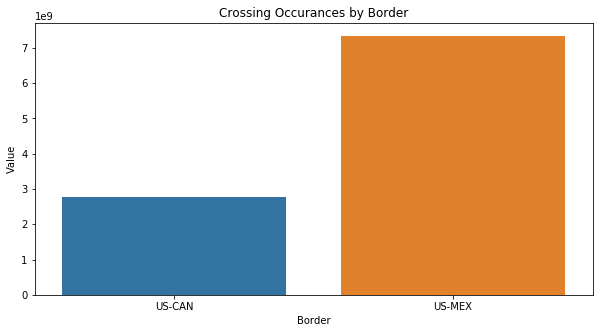

In [7]:
border=df.groupby('Border').sum()['Value'].reset_index()
plt.figure(figsize=(10,5))
sns.barplot(x='Border',y='Value',data=border)
plt.title('Crossing Occurances by Border')

Text(0.5, 1.0, 'Amount per year')

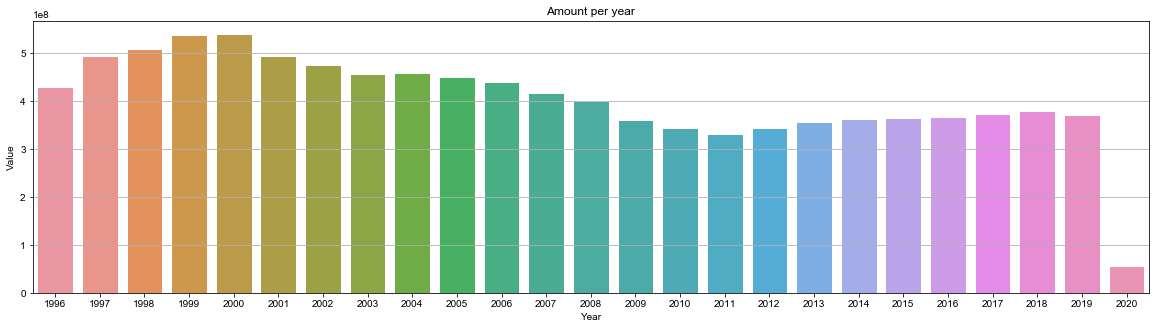

In [8]:
#Visual of border crossings from 1996 to 2020
sum_crossing=df.groupby(['Year']).sum()['Value'].reset_index()
plt.figure(figsize=(20,5))
plt.grid()
sns.set_style('whitegrid')
sns.barplot(x='Year',y='Value',data=sum_crossing)
plt.title('Amount per year')

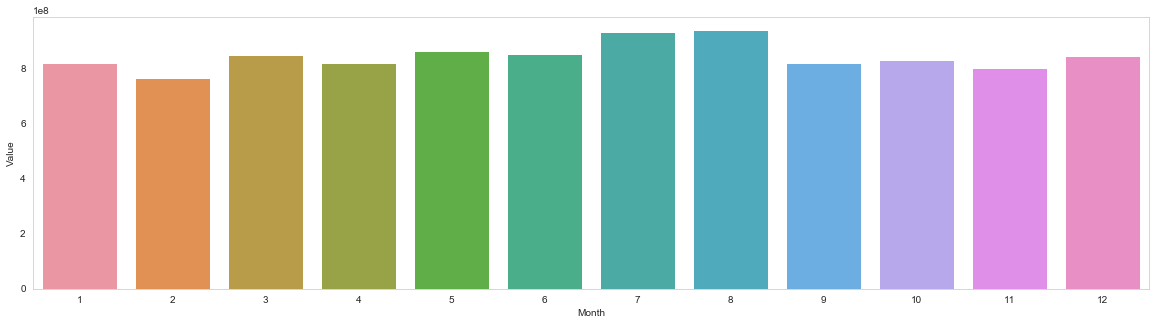

In [9]:
#Visual of crossing by month over the years
sum_month=df.groupby('Month').sum()['Value'].reset_index()
plt.figure(figsize=(20,5))
plt.grid()
sns.set_style('whitegrid')
sns.barplot(x='Month',y='Value',data=sum_month)

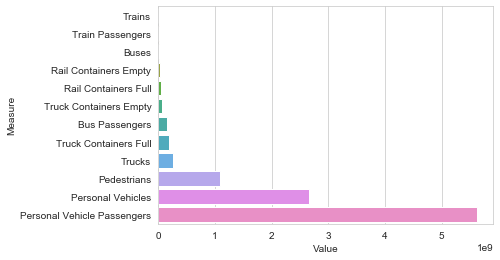

In [10]:
vehicle_sum=df.groupby(['Measure']).sum()['Value'].reset_index().sort_values('Value',ascending=True)
sns.barplot(x='Value',y='Measure',data=vehicle_sum)

In [11]:
mexico_sum=sum(border[border['Border']=='US-MEX']['Value'])
canada_sum=sum(border[border['Border']=='US-CAN']['Value'])
total=mexico_sum+canada_sum

#Percentage related to mexico entries
mexico_sum/total*100

72.55008518841886

In [12]:
canada_sum/total*100

27.449914811581145

In [56]:
people = df[df['Measure'].isin(['Personal Vehicle Passengers', 'Bus Passengers','Pedestrians', 'Train Passengers'])]
vehicles = df[df['Measure'].isin(['Trucks', 'Rail Containers Full','Truck Containers Empty', 'Rail Containers Empty',
       'Personal Vehicles', 'Buses', 'Truck Containers Full'])]
people_borders = people[['Border','Value']].groupby('Border').sum()
values = people_borders.values.flatten()
labels = people_borders.index

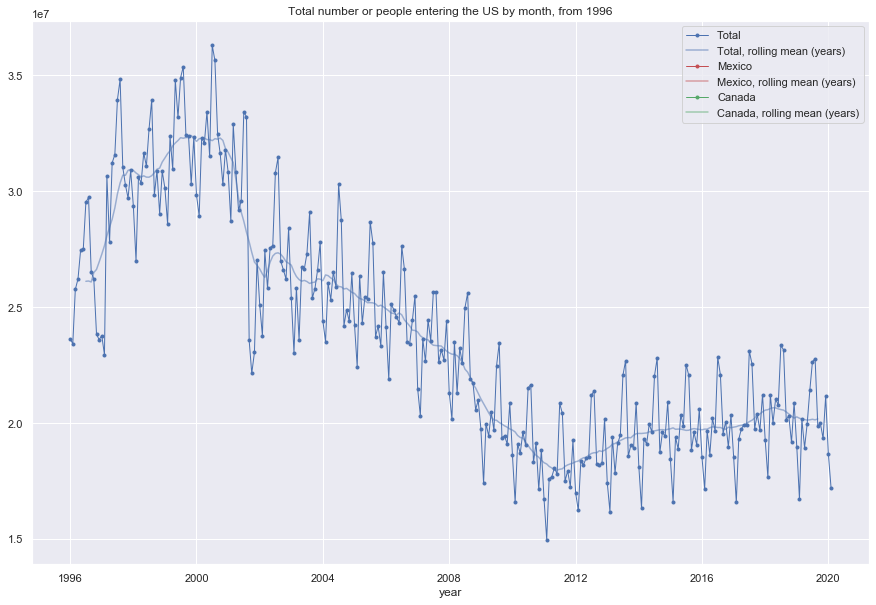

In [53]:
#Forecasting using ARIMA model
people_crossing_series = people[['Date','Value']].groupby('Date').sum()
people_crossing_series_CAN = people[people['Border'] == 'US-Canada Border'][['Date','Value']].groupby('Date').sum()
people_crossing_series_MEX = people[people['Border'] == 'US-Mexico Border'][['Date','Value']].groupby('Date').sum()

sns.set(rc={'figure.figsize':(15, 10)})
fig, ax = plt.subplots()

#Define a rolling mean, by years
rmean = people_crossing_series.rolling(12, center=True).mean()
rmean_MEX = people_crossing_series_MEX.rolling(12, center=True).mean()
rmean_CAN = people_crossing_series_CAN.rolling(12, center=True).mean()

ax.plot(people_crossing_series,
       marker='.', linestyle='-', linewidth=1, alpha = 1, label='Total')
ax.plot(rmean,
       marker=None, linestyle='-', linewidth=1.5, alpha = 0.5, label='Total, rolling mean (years)', color = 'b')


ax.plot(people_crossing_series_MEX,
       marker='.', linestyle='-', linewidth=1, alpha = 1, label='Mexico', color = 'r')
ax.plot(rmean_MEX,
       marker=None, linestyle='-', linewidth=1.5, alpha = 0.5, label='Mexico, rolling mean (years)', color = 'r')


ax.plot(people_crossing_series_CAN,
       marker='.', linestyle='-', linewidth=1, alpha = 1, label='Canada', color = 'g')
ax.plot(rmean_CAN,
       marker=None, linestyle='-', linewidth=1.5, alpha = 0.5, label='Canada, rolling mean (years)', color = 'g')


ax.set(title = 'Total number or people entering the US by month, from 1996', xlabel = 'year')
ax.legend()

plt.show()

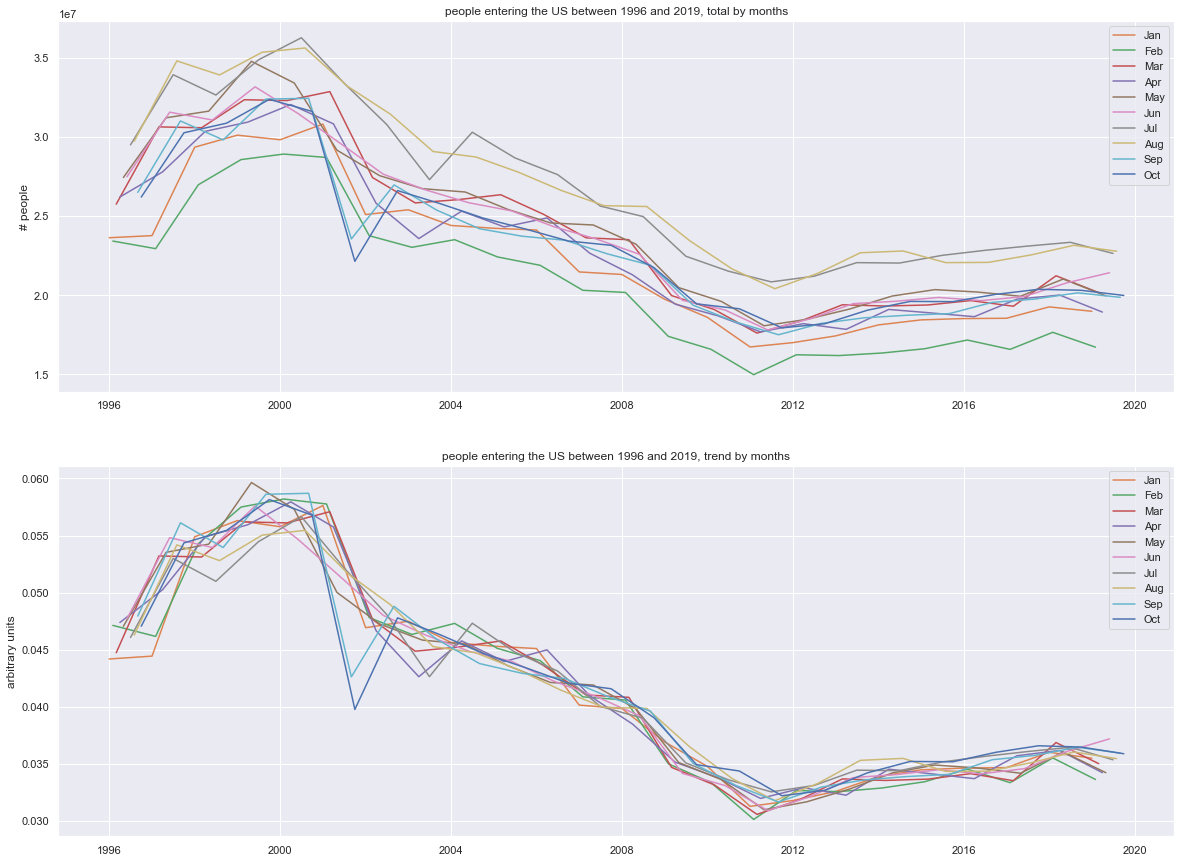

In [55]:
start = '1996'
end = '2019'
pcsm = people_crossing_series.loc[start:end]

fig, ax = plt.subplots(2,figsize = (20,15))

for i in range(11) :
    mm = pcsm[pcsm.index.month == i] 
    ax[0].plot(mm, label = calendar.month_abbr[i])
    ax[1].plot(mm/mm.sum(), label = calendar.month_abbr[i])
    
ax[0].set(title = 'people entering the US between {} and {}, total by months'.format(start, end),
         ylabel = '# people')
ax[1].set(title = 'people entering the US between {} and {}, trend by months'.format(start, end),
         ylabel = 'arbitrary units')
ax[0].legend()
ax[1].legend()

plt.show()

In [19]:
#This series is not stationary
index_list = des.index
values = list(des)
d = {'Value':values} 
des = pd.DataFrame(d, index = index_list) 
result = adfuller(des.Value.dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -0.753420
p-value: 0.832423


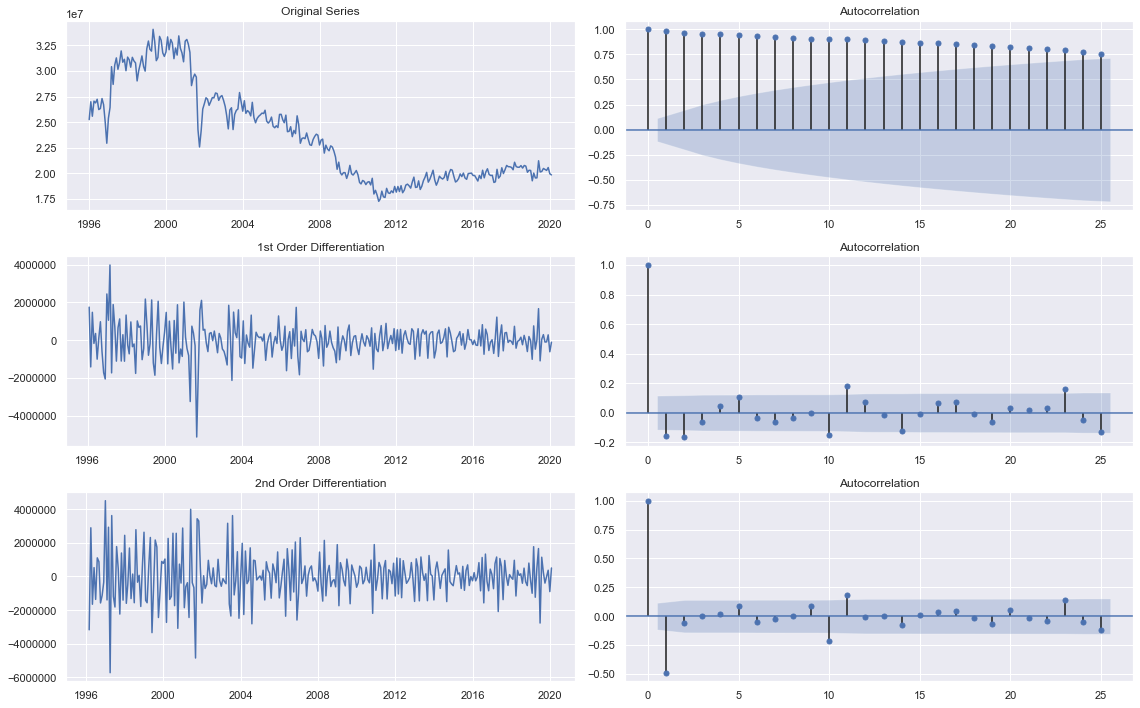

In [20]:
fig, axes = plt.subplots(3, 2, figsize=(16,10))

axes[0, 0].plot(des.Value)
axes[0, 0].set_title('Original Series')
plot_acf(des, ax=axes[0, 1])

axes[1, 0].plot(des.Value.diff()); axes[1, 0].set_title('1st Order Differentiation')
plot_acf(des.diff().dropna(), ax=axes[1, 1])

axes[2, 0].plot(des.diff().diff()); axes[2, 0].set_title('2nd Order Differentiation')
plot_acf(des.diff().diff().dropna(), ax=axes[2, 1])

plt.tight_layout()
plt.show()

In [21]:
result_diff = adfuller(des.diff().Value.dropna())
print('ADF Statistic: %f' % result_diff[0])
print('p-value: %f' % result_diff[1])

ADF Statistic: -5.204424
p-value: 0.000009


In [22]:
model = ARIMA(des, order=(0,1,1))
model_fit = model.fit(disp=0)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.Value   No. Observations:                  289
Model:                 ARIMA(0, 1, 1)   Log Likelihood               -4369.482
Method:                       css-mle   S.D. of innovations         891130.433
Date:                Sat, 27 Jun 2020   AIC                           8744.964
Time:                        01:15:32   BIC                           8755.964
Sample:                    02-01-1996   HQIC                          8749.372
                         - 02-01-2020                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const          -1.87e+04   3.83e+04     -0.488      0.625   -9.38e+04    5.64e+04
ma.L1.D.Value    -0.2700      0.072     -3.734      0.000      -0.412      -0.128
                                    Root

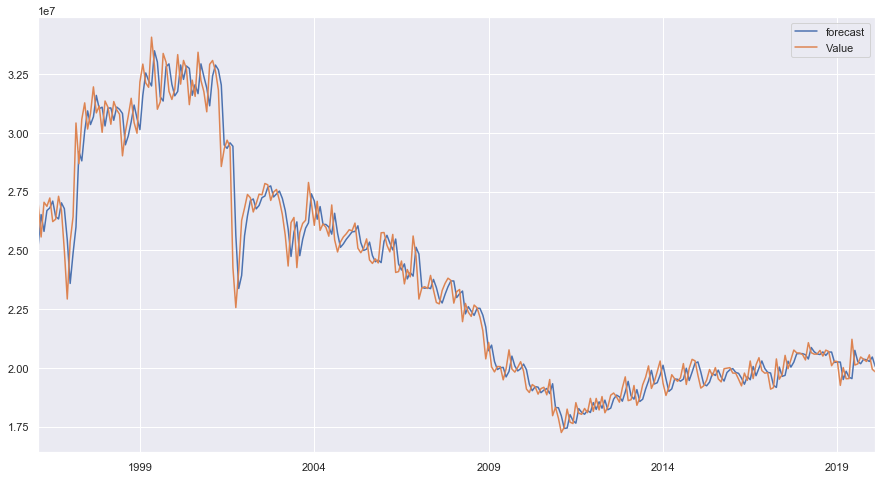

In [23]:
model_fit.plot_predict()
plt.show()

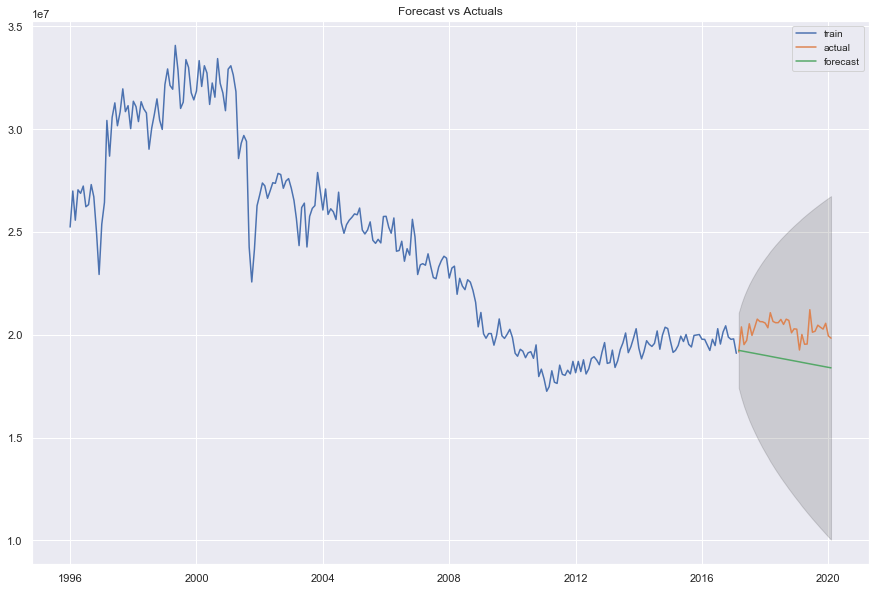

In [24]:
#Margin of error for this prediction was too large
train = des[:254]
test = des[254:]
model_train = ARIMA(train, order=(0,1,1))  

fitted_train = model_train.fit(disp=-1)  
fc, se, conf = fitted_train.forecast(36, alpha=0.05)  # 95% conf
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

plt.figure(figsize=(15,10))
plt.plot(train, label='train')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper right', fontsize=10)
plt.show()

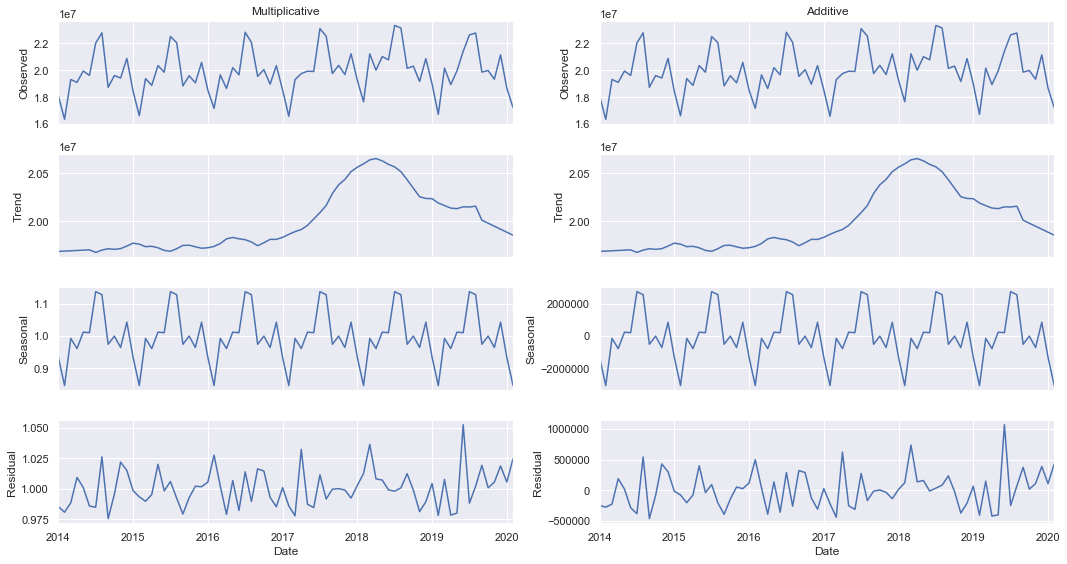

In [25]:
#Let's rerun the ARIMA model and narrow it down to 5 years to avoid overfitting of model
pcsm = people_crossing_series.loc['2014':]
res_mul = seasonal_decompose(pcsm, model='multiplicative', extrapolate_trend='freq')
res_add = seasonal_decompose(pcsm, model='additive', extrapolate_trend='freq')

# Plot
fig, axes = plt.subplots(ncols=2, nrows=4, sharex=True, figsize=(15,8))

res_mul.observed.plot(ax=axes[0,0], legend=False)
axes[0,0].set_ylabel('Observed')

res_mul.trend.plot(ax=axes[1,0], legend=False)
axes[1,0].set_ylabel('Trend')

res_mul.seasonal.plot(ax=axes[2,0], legend=False)
axes[2,0].set_ylabel('Seasonal')

res_mul.resid.plot(ax=axes[3,0], legend=False)
axes[3,0].set_ylabel('Residual')

res_add.observed.plot(ax=axes[0,1], legend=False)
axes[0,1].set_ylabel('Observed')

res_add.trend.plot(ax=axes[1,1], legend=False)
axes[1,1].set_ylabel('Trend')

res_add.seasonal.plot(ax=axes[2,1], legend=False)
axes[2,1].set_ylabel('Seasonal')

res_add.resid.plot(ax=axes[3,1], legend=False)
axes[3,1].set_ylabel('Residual')

axes[0,0].set_title('Multiplicative')
axes[0,1].set_title('Additive')
    
plt.tight_layout()
plt.show()

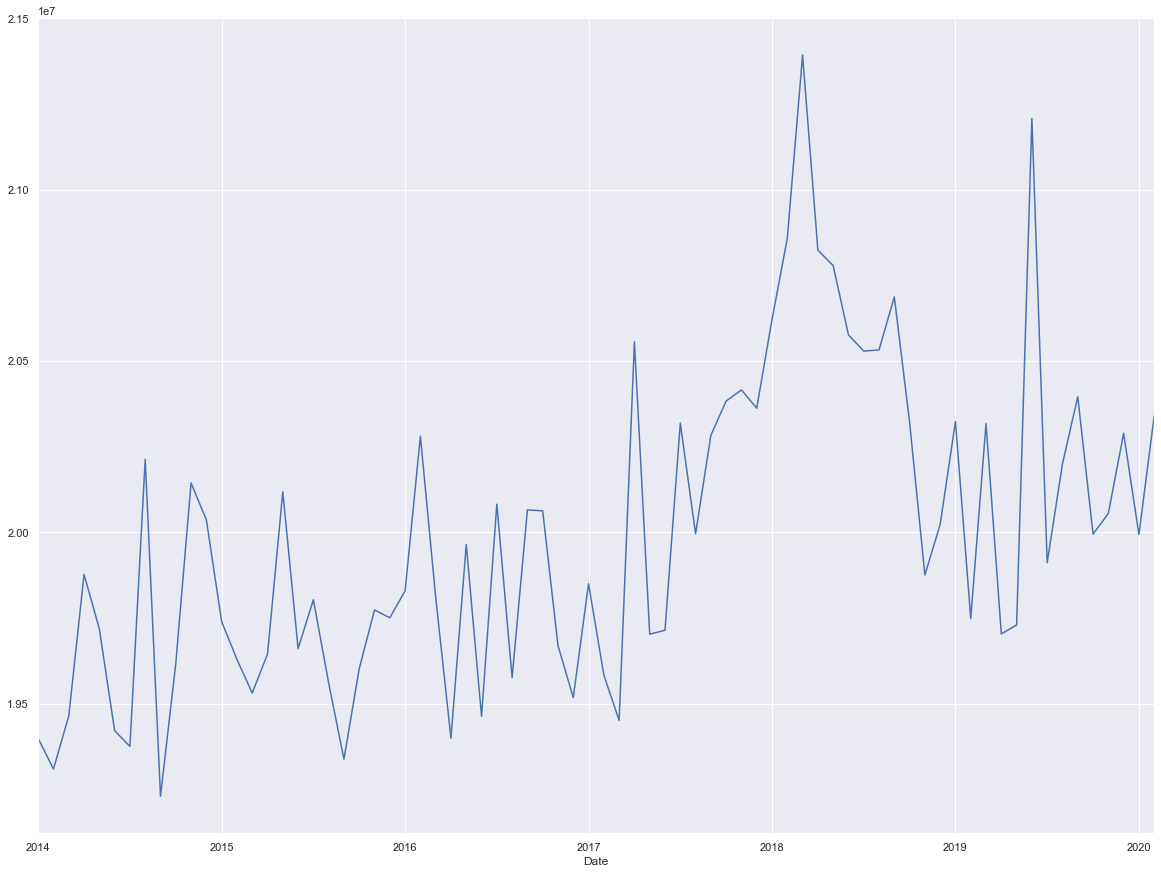

In [26]:
des = res_mul.trend * res_mul.resid
des.plot(figsize = (20,15))
plt.show()

In [27]:
index_list = des.index
values = list(des)
d = {'Value':values} 
des = pd.DataFrame(d, index = index_list) 
result = adfuller(des.Value.dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -2.117663
p-value: 0.237472


In [28]:
result_diff = adfuller(des.diff().Value.dropna())
print('ADF Statistic: %f' % result_diff[0])
print('p-value: %f' % result_diff[1])

ADF Statistic: -11.882975
p-value: 0.000000


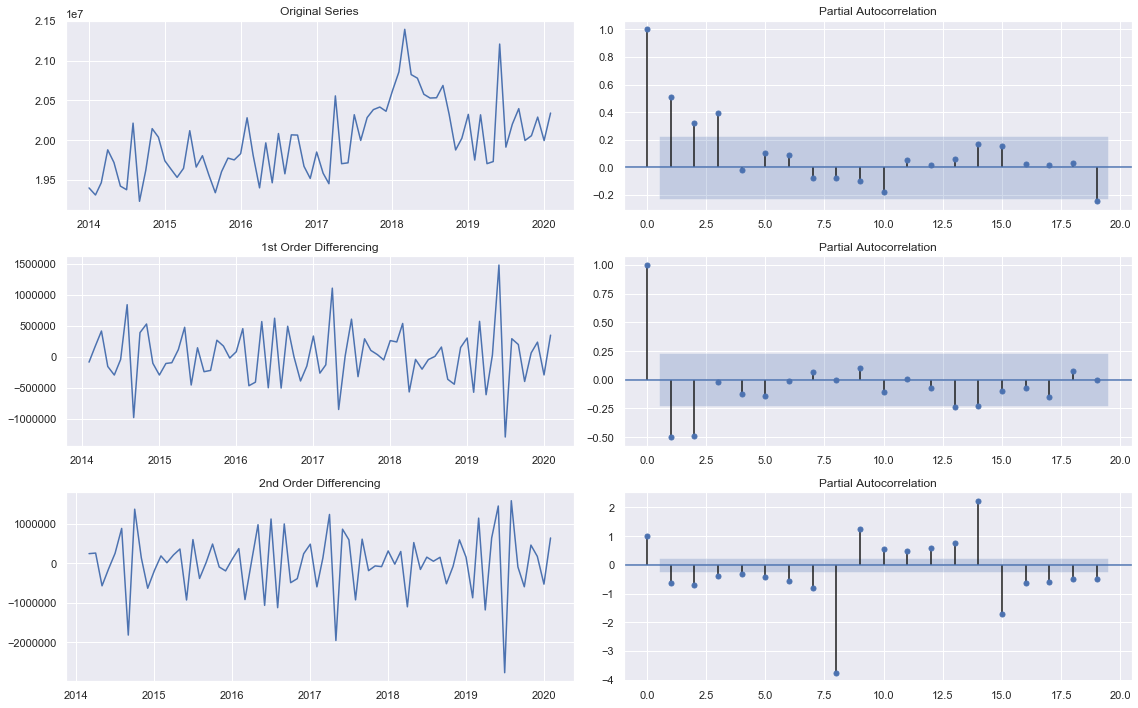

In [29]:
fig, axes = plt.subplots(3, 2, figsize=(16,10))

axes[0, 0].plot(des.Value)
axes[0, 0].set_title('Original Series')
plot_pacf(des, ax=axes[0, 1])

axes[1, 0].plot(des.Value.diff()); axes[1, 0].set_title('1st Order Differencing')
plot_pacf(des.diff().dropna(), ax=axes[1, 1])
axes[2, 0].plot(des.diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_pacf(des.diff().diff().dropna(), ax=axes[2, 1])

plt.tight_layout()
plt.show()

In [30]:
model = ARIMA(des, order=(0,1,1))
model_fit = model.fit(disp=0)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.Value   No. Observations:                   73
Model:                 ARIMA(0, 1, 1)   Log Likelihood               -1037.027
Method:                       css-mle   S.D. of innovations         355842.686
Date:                Sat, 27 Jun 2020   AIC                           2080.055
Time:                        01:15:40   BIC                           2086.926
Sample:                    02-01-2014   HQIC                          2082.793
                         - 02-01-2020                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const           1.29e+04   1.29e+04      0.999      0.318   -1.24e+04    3.82e+04
ma.L1.D.Value    -0.7032      0.082     -8.621      0.000      -0.863      -0.543
                                    Root

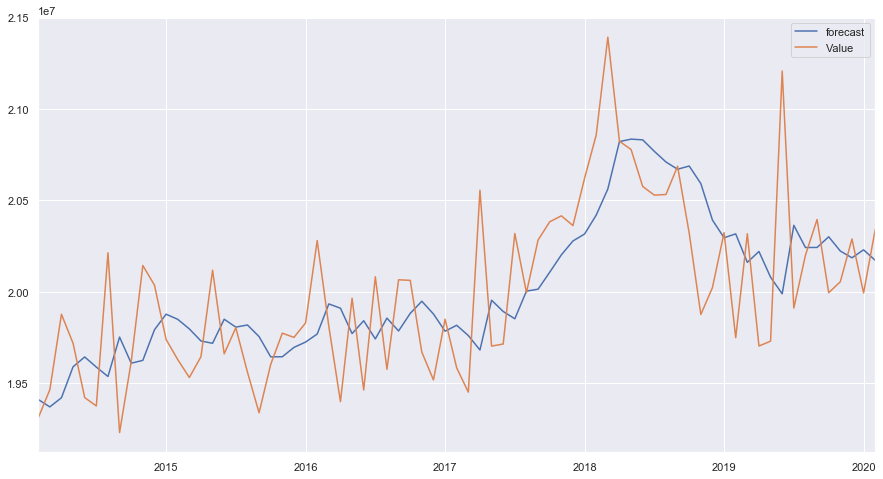

In [31]:
model_fit.plot_predict()
plt.show()

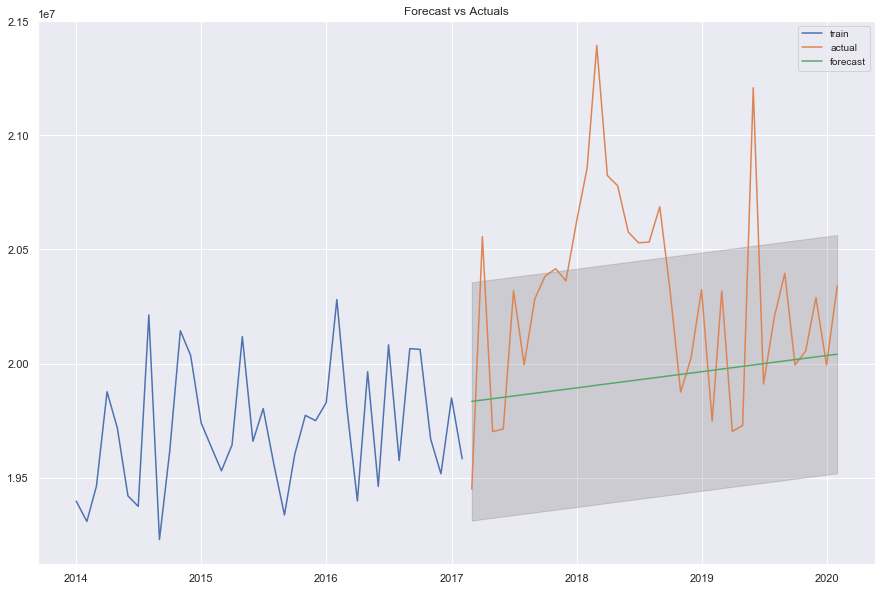

In [32]:
train = des[:38]
test = des[38:]
model_train = ARIMA(train, order=(0,1,1))  

fitted_train = model_train.fit(disp=-1)  
fc, se, conf = fitted_train.forecast(36, alpha=0.05)  # 95% conf
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

plt.figure(figsize=(15,10))
plt.plot(train, label='train')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper right', fontsize=10)
plt.show()

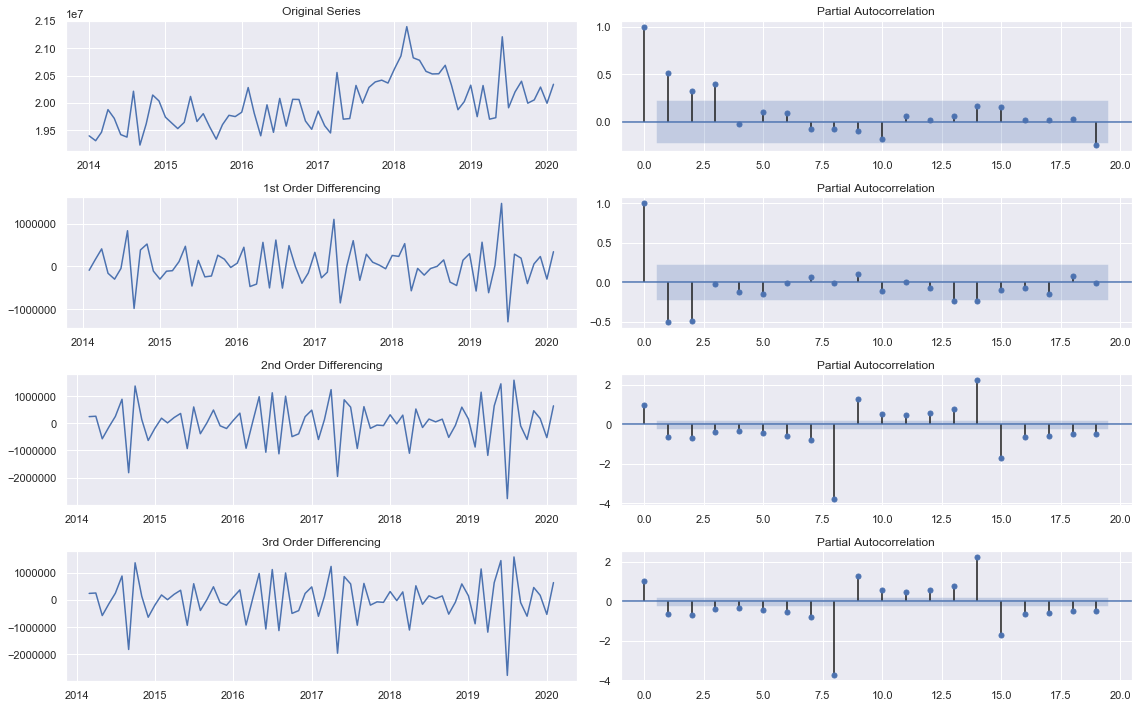

In [48]:
#3rd order differencing is not necessary since we want to use the lowest order possible
fig, axes = plt.subplots(4, 2, figsize=(16,10))

axes[0, 0].plot(des.Value)
axes[0, 0].set_title('Original Series')
plot_pacf(des, ax=axes[0, 1])

axes[1, 0].plot(des.Value.diff()); axes[1, 0].set_title('1st Order Differencing')
plot_pacf(des.diff().dropna(), ax=axes[1, 1])
axes[2, 0].plot(des.diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_pacf(des.diff().diff().dropna(), ax=axes[2, 1])
axes[3, 0].plot(des.diff().diff()); axes[3, 0].set_title('3rd Order Differencing')
plot_pacf(des.diff().diff().dropna(), ax=axes[3, 1])

plt.tight_layout()
plt.show()